In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/nbPmKbcsJvZrjjx/291694/AnalysisResults.root' > run291694.mc.root

!file *.root
file = uproot.open("run291694.mc.root")

events = file["eventsTree"]

events.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6915k  100 6915k    0     0  1792k      0  0:00:03  0:00:03 --:--:-- 1792k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
xVtx                 | double                   | AsDtype('>f8')
yVtx                 | double                   | AsDtype('>f8')
zVtx                 | double                   | AsDtype('>f8')
isCINT               | bool                     | AsDtype('bool')
isCMSL               | bool                     | AsDtype('bool')
isCMSH               | bool                     | AsDtype('bool')
isCMLL             

In [6]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/JIjQaAYEQnmRDkX/290223/AnalysisResults.root' > run290223.data.root

!file *.root
file = uproot.open("run290223.data.root")

events = file["eventsTree"]

events.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3602k  100 3602k    0     0   884k      0  0:00:04  0:00:04 --:--:--  885k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
xVtx                 | double                   | AsDtype('>f8')
yVtx                 | double                   | AsDtype('>f8')
zVtx                 | double                   | AsDtype('>f8')
isCINT               | bool                     | AsDtype('bool')
isCMSL               | bool                     | AsDtype('bool')
isCMSH               | bool                     | AsDtype('bool')
isCMLL             

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3602k  100 3602k    0     0   624k      0  0:00:05  0:00:05 --:--:--  823k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)


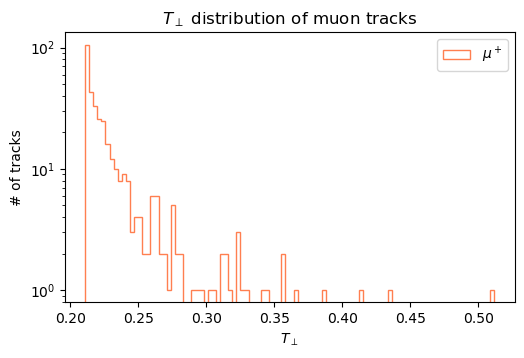

In [8]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

def mag(px:float,py:float,pz:float):
    """Returns the norm of the 3-vector (px,py,pz)."""
    return math.sqrt(px*px+py*py+pz*pz)

def invMass(p:float, E:float):
    """Returns the invariant mass of the event"""
    return math.sqrt(E*E - p*p)

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/JIjQaAYEQnmRDkX/290223/AnalysisResults.root' > run290223.data.root

!file *.root
file = uproot.open("run290223.data.root")

events = file["eventsTree"]

c = 299792458.

m = events.arrays(["nMuons","Muon_Px","Muon_Py","Muon_Pz", "Muon_E", "Muon_Charge"],how="zip",entry_stop=1000000)
charge = np.array([0,0])
momentum = np.array([0.,0.])
totalMomentum = 0.
energy = np.array([0.,0.])
totalEnergy = 0.

invariantMass = np.array([],dtype=float)

for event in m[m.nMuons==2]:
    tracks = event["Muon"].to_list()
    i = 0
    for t in tracks:
        momentum[i] = mag(t["Px"], t["Py"], t["Pz"])
        energy[i] = t["E"]
        if (t["Charge"] == 1):
            charge[i] = 1
        elif (t["Charge"] == -1):
            charge[i] = -1
        i += 1
    if charge[0] != charge[1]:
        totalMomentum = np.sum(momentum)
        totalEnergy = np.sum(energy)
        invariantMass = np.append(invariantMass, invMass(totalMomentum, totalEnergy))
            
fig = plt.figure(figsize=(5,3))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.set_title("$T_\perp$ distribution of muon tracks")
axes.set_xlabel("$T_\perp$")
axes.set_ylabel("# of tracks")
axes.set_yscale("log")
axes.hist(invariantMass,bins=100,label="$\mu^+{}$",color='coral',histtype='step');
axes.legend();

In [ ]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector

!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/JIjQaAYEQnmRDkX/290223/AnalysisResults.root' > run290223.data.root

!file *.root
file = uproot.open("run290223.data.root")

events = file["eventsTree"]

c = 299792458

m = events.arrays(["nMuons","Muon_Px","Muon_Py","Muon_Pz", "Muon_E", "Muon_Charge"],how="zip",entry_stop=10000)

transverseMomentum = np.array([],dtype=float)
for event in m[m.nMuons>0]:
    tracks = event["Muon"].to_list()
    for t in tracks:
        transverseMomentum = np.append(transverseMomentum, t["Pz"])
plt.hist(transverseMomentum, bins=1000);